Description: 
    dataset: Volve Production Data

Notebook: This exploratory analitycs has a objetive to find conclusions about data, find outliers, fill null values and scale dataset. After that, it can be turned to a machine learning application

In [2]:
#Importing libraries
import numpy as np #mathematical
import pandas as pd #dataframes
import matplotlib.pyplot as plt #vizualizations
import seaborn as sns ##statistics
import math

In [5]:
#Reading dataset
df = pd.read_csv('volve_production_data.csv',index_col=0,parse_dates=True)
df.head().columns

Index(['onstreaminject_HRS', 'BORE_WI_VOL', 'ON_STREAM_HRS',
       'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING',
       'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P in percentage', 'AVG_WHP_P',
       'AVG_WHT_P', 'DP_CHOKE_SIZE', 'BORE_OIL_VOL', 'BORE_GAS_VOL',
       'BORE_WAT_VOL'],
      dtype='object')

Identifying the columns values

'onstreaminject_HRS': Injection Rates by Hours
'BORE_WI_VOL': Injected volume of water
'ON_STREAM_HRS': On stream hours by day (active producing time)
'AVG_DOWNHOLE_PRESSURE': 
'AVG_DOWNHOLE_TEMPERATURE':
'AVG_DP_TUBING':
'AVG_ANNULUS_PRESS':
'AVG_CHOKE_SIZE_P in percentage':
'AVG_WHP_P':
'AVG_WHT_P':
'DP_CHOKE_SIZE':
'BORE_OIL_VOL': Oil volume produced
'BORE_GAS_VOL': Gas volume produced
'BORE_WAT_VOL': Water volume produced

In [7]:
#Checking the correlation between BORE_OIL_VOL and other columns
df.corr()['BORE_OIL_VOL']

#The correlation function show us that ON_STREAM__HRS has a increment by aproximately 37%
#in BORE_OIL_VOL

#BORE_WAT_VOL has a negative correlation in BORE_OIL_VOL values.

onstreaminject_HRS                0.182405
BORE_WI_VOL                       0.368739
ON_STREAM_HRS                     0.361124
AVG_DOWNHOLE_PRESSURE             0.819920
AVG_DOWNHOLE_TEMPERATURE          0.850241
AVG_DP_TUBING                     0.778941
AVG_ANNULUS_PRESS                 0.163663
AVG_CHOKE_SIZE_P in percentage   -0.049757
AVG_WHP_P                         0.544204
AVG_WHT_P                         0.245750
DP_CHOKE_SIZE                     0.434375
BORE_OIL_VOL                      1.000000
BORE_GAS_VOL                      0.998661
BORE_WAT_VOL                     -0.364295
Name: BORE_OIL_VOL, dtype: float64

<AxesSubplot:>

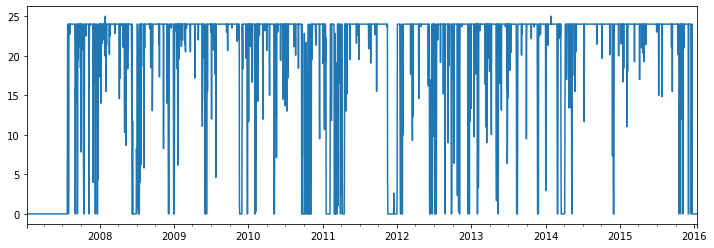

In [6]:
df['onstreaminject_HRS'].plot(figsize=(12,4))

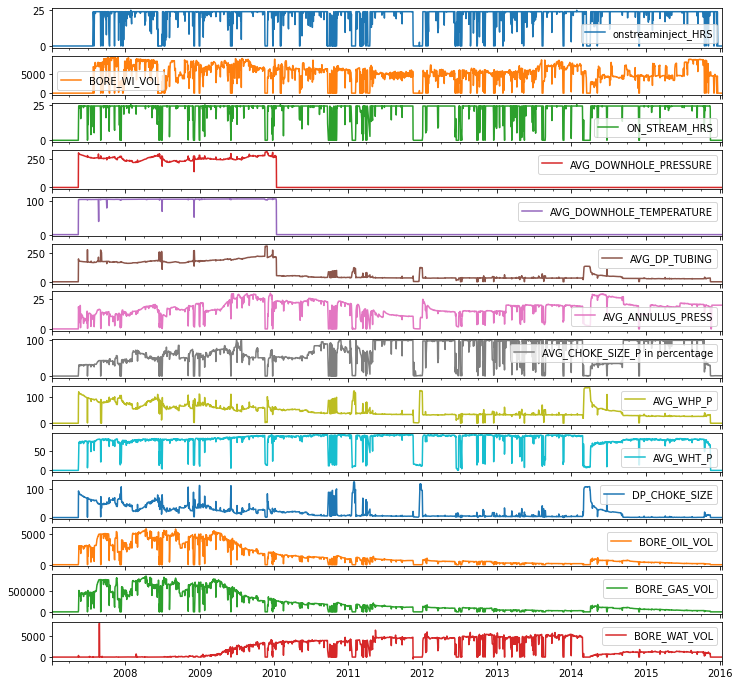

In [8]:
#Identifying the features inside the dataset
df.plot(subplots=True,figsize=(12,12)); #The ';' character removes comments
#df.head()

#With this plot is possible to analize the data and storytelling about his values.

<AxesSubplot:>

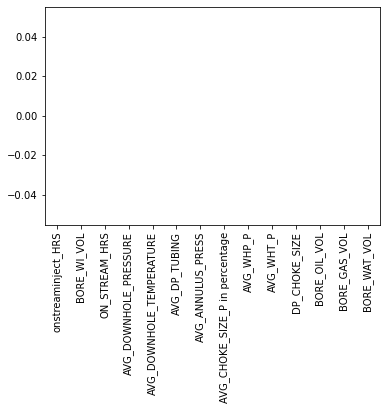

In [11]:
#Machine learning cannot work with empty values in the dataset
df.isnull().sum().sort_values().plot(kind='bar')

In [13]:
#Analyzing outliers
df.describe()

,onstreaminject_HRS,BORE_WI_VOL,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P in percentage,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
count,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000
mean,19.528256,4935.663628,20.017419,76.283155,31.424488,80.758924,16.368846,64.158081,45.803679,74.345872,18.657338,1402.086752,204365.771346,2105.660438
std,8.669803,2625.955533,8.303784,118.248271,48.547561,73.006429,7.197959,33.810811,25.954204,26.140866,22.896388,1642.492700,232710.410394,1952.495950
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-458.000000
25%,21.670000,3972.500000,24.000000,0.000000,0.000000,32.235500,12.543000,40.983840,32.199000,76.549000,3.663500,211.000000,33259.000000,40.500000
50%,24.000000,5335.000000,24.000000,0.000000,0.000000,37.921250,18.019000,65.988040,37.464000,81.693000,6.819000,664.000000,101142.000000,1260.000000
75%,24.000000,6851.500000,24.000000,235.838500,105.919000,170.045500,20.587000,99.895675,59.079500,90.002500,26.760500,2026.000000,295593.000000,4109.000000
max,25.000000,9316.000000,25.000000,317.701000,107.508000,314.409000,30.020000,100.000000,137.311000,92.459000,124.123000,5902.000000,851132.000000,8020.000000
